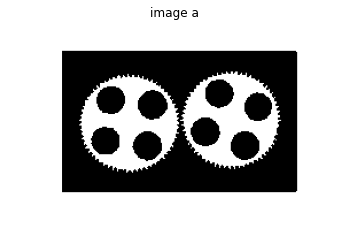

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


base = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)

# use thresholding to get the binary image
_, img_a = cv2.threshold(base, 225, 255, cv2.THRESH_BINARY)

plt.imshow(img_a, cmap='gray')
plt.title('image a')
plt.axis('off')
plt.show()

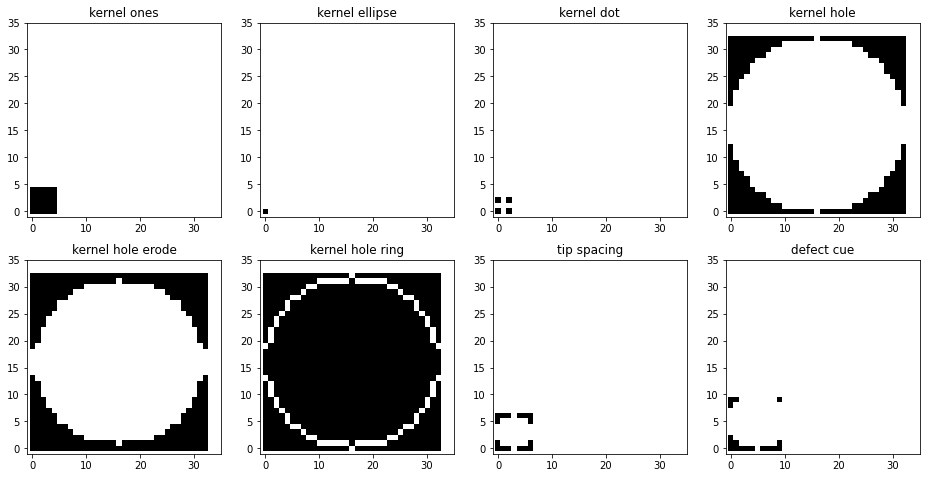

In [2]:
# design some kernels later we will use
kernel_ones = np.ones((5,5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33))
kernel_hole_erode = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_erode
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
defect_cue = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

# apply side-by-side plots for kernels
plt.figure(num='kernels', figsize=(16,8))

plt.subplot(2,4,1)
plt.title('kernel ones')
plt.imshow(kernel_ones, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,2)
plt.title('kernel ellipse')
plt.imshow(kernel_ellipse, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,3)
plt.title('kernel dot')
plt.imshow(kernel_dot, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,4)
plt.title('kernel hole')
plt.imshow(kernel_hole, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,5)
plt.title('kernel hole erode')
plt.imshow(kernel_hole_erode, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,6)
plt.title('kernel hole ring')
plt.imshow(kernel_hole_ring, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,7)
plt.title('tip spacing')
plt.imshow(tip_spacing, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.subplot(2,4,8)
plt.title('defect cue')
plt.imshow(defect_cue, cmap='gray')
plt.xlim([-1, 35])
plt.ylim([-1, 35])

plt.show()

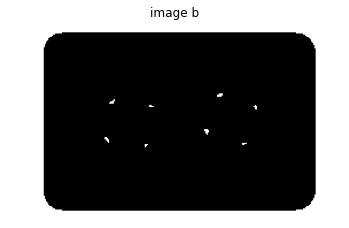

In [3]:
img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)

plt.imshow(img_b, cmap='gray')
plt.title('image b')
plt.axis('off')
plt.show()

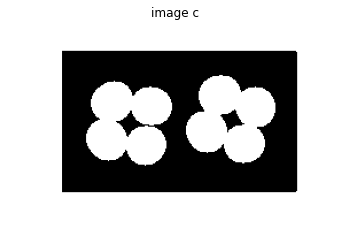

In [4]:
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)

plt.imshow(img_c, cmap='gray')
plt.title('image c')
plt.axis('off')
plt.show()

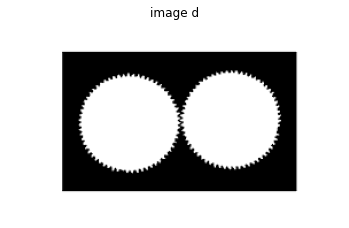

In [5]:
img_d = cv2.bitwise_or(base, img_c)

plt.imshow(img_d, cmap='gray')
plt.title('image d')
plt.axis('off')
plt.show()

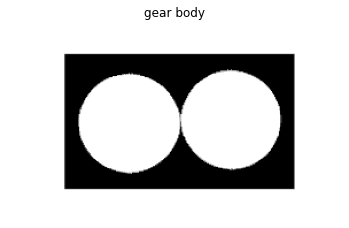

In [6]:
gear_body = cv2.morphologyEx(img_d, cv2.MORPH_OPEN, kernel_hole_erode)
gear_body = cv2.dilate(gear_body, kernel_dot, iterations=2)

plt.imshow(gear_body, cmap='gray')
plt.title('gear body')
plt.axis('off')
plt.show()

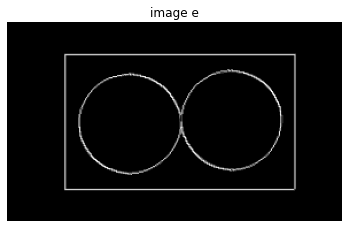

In [7]:
img_e = cv2.morphologyEx(gear_body, cv2.MORPH_GRADIENT, kernel_ellipse)

plt.imshow(img_e, cmap='gray')
plt.title('image e')
plt.axis('off')
plt.show()

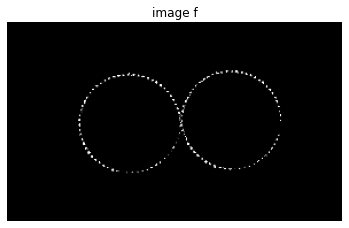

In [8]:
img_f = cv2.bitwise_and(img_e, img_d)
img_f = cv2.convertScaleAbs(img_f, alpha=3)

plt.imshow(img_f, cmap='gray')
plt.title('image f')
plt.axis('off')
plt.show()

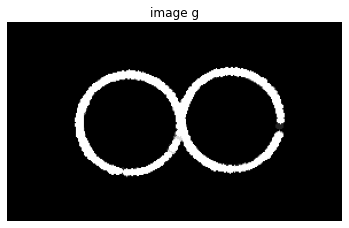

In [9]:
img_g = cv2.dilate(img_f, tip_spacing, iterations=1)
img_g = cv2.convertScaleAbs(img_g, alpha=4)

plt.imshow(img_g, cmap='gray')
plt.title('image g')
plt.axis('off')
plt.show()

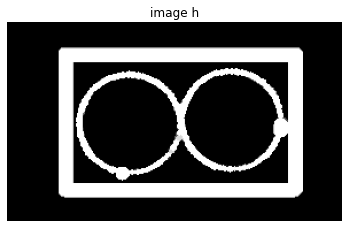

In [10]:
img_h = cv2.subtract(img_e, img_g)
img_h = cv2.dilate(img_h, kernel_dot, iterations=1)
img_h = cv2.convertScaleAbs(img_h, alpha=4)
img_h = cv2.dilate(img_h, defect_cue, iterations=1)
img_g = cv2.erode(img_g, kernel_dot, iterations=1)
img_detect = cv2.bitwise_and(img_h, img_g)
img_h = cv2.bitwise_or(img_h, img_g)

plt.imshow(img_h, cmap='gray')
plt.title('image h')
plt.axis('off')
plt.show()

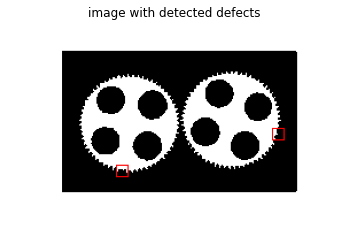

In [41]:
# use cv2.SimpleBlobDetector to detect small blob pixels
params = cv2.SimpleBlobDetector_Params()
params.filterByInertia = False
params.filterByConvexity = False
params.filterByCircularity = False

# get a BGR version of image a
rgb_a = cv2.cvtColor(img_a, cv2.COLOR_GRAY2BGR)

# apply threshold to get a binary image for blob detection
retval, detect_threshold = cv2.threshold(img_detect, 200, 255, cv2.THRESH_BINARY_INV)

# create a detector object using pre-defined parameters
detector = cv2.SimpleBlobDetector_create(params)

# get the keypoint object
keypoints = detector.detect(detect_threshold)

# iterate each detected blob and draw rectangles at the defect points
for i in keypoints:
    x, y = np.int(i.pt[0]), np.int(i.pt[1])
    gap = 5
    
    # notice there's no boundary check for pt1 and pt2, you have to do that yourself
    cv2.rectangle(rgb_a, (x-gap, y-gap), (x+gap, y+gap), (255,0,0), thickness=1)

plt.imshow(rgb_a)
plt.title('image with detected defects')
plt.axis('off')
plt.show()

## HW2 Report

In this homework I learned how to use Morphological Filter from OpenCV library and it is very interesting to figure out how 
those filters can be combined in order to reach our goal - detect missing teeth from a gear image.

Bascially it is all about experiment with some basic knowlegdes relative to image processing. When you want to make the boundry bigger or thicker, use dilate filter and when the situation come to contrary way it is time to use erode filter. Using a bigger circle substracted from a smaller cilcle to get a ring structure element and also others. It is a good practice for understanding Morphological Filters and I learned a lot from the homework this time.